                 
<div style="background-color: #50586C"><br><br><br>
    <h1 style="font-size: 36pt; color: #DCE2F0; text-align: center; padding-left: 20px; padding-right: 20px">How to validate data in large CSV-files with Python</h1>
    <h2 style="font-size: 26pt; color: #DCE2F0; text-align: center">a quick and easy solution</h2><br><br><br>
</div>
<div style="background-color: #DCE2F0"><br>
   <h3 style="font-size: 16pt; color: #50586C; text-align: center; padding-left: 20px; padding-right: 20px">A supplemental notebook  ... </h3><br><br>
</div>

In [1]:
# LIbraries
import pandas as pd
import numpy as np
import random
import csv
import zipfile
import hashlib
import sys
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Alter size of display
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#pd.set_option('display.max_colwidth', None)

C:\Users\ARFEV\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">1. Determining encoding and counting the number of rows</h2>
</div>
<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Her er litt vanlig skrift</span><br>
    <span style="color: #50586C; padding-left: 40px">The data used in this notebook can be found here:<br><br>
</div>

In [2]:
# Get encoding and number of lines of CSV-file
with open('data/VGO_EUV_Tema_2022.csv') as file:
    encoding = file.encoding
    print(f"The encoding of the file is: {encoding}")
    for number_of_lines, line in enumerate(file):
        ...
    number_of_lines += 1 
    print(f"The number of lines in the file is: {number_of_lines:,}")

The encoding of the file is: cp1252
The number of lines in the file is: 72,759,549


In [3]:
# Importing the first 10-rows into a Pandas dataframe, to look at the data
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=10, sep=";", encoding='cp1252')
df

,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
5,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
6,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
7,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
8,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
9,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548


<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">2. Transforming Test Data into Hashed Keys</h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Her er litt vanlig skrift</span><br>
    <span style="color: #50586C; padding-left: 40px">'ISO-8859-1'</span><br><br>
</div>

In [22]:
def key_maker(input_file, output_file, limit_empty, limit_stop=float('inf'), delimiter_input=";", skip_columns=[]):
    """
    This function reads a CSV file, processes specified columns, concatenates their values, and hashes the result using SHA256.
    The hashed keys are then written to an output file in a single-row CSV format.

    Parameters:
    - input_file (str): The path to the input CSV file.
    - output_file (str): The path to the output file where hashed keys will be stored.
    - limit_empty (int): The maximum number of rows to accumulate before writing to the output file.
    - limit_stop (int, optional): The maximum number of rows to process from the input file (default is infinity).
    - delimiter_input (str, optional): The delimiter used in the input CSV file (default is semicolon ';').
    - skip_columns (list, optional): A list of column indices to skip while creating keys.

    Returns:
    None

    Example:
    key_maker('input.csv', 'output.csv', limit_empty=1000, limit_stop=5000, delimiter_input=',', skip_columns=[2, 4])
    """

    # Record the start time for performance measurement
    start = time.perf_counter()

    # Open the input CSV file for reading
    with open(input_file) as file_read:
        csv_reader = csv.reader(file_read, delimiter=delimiter_input)

        # Initialize variables for iteration and key storage
        iteration_count = 1
        key_list = []

        # Iterate through the rows in the input CSV file
        for row_count, data in enumerate(csv_reader, 1):
            
            # Check if the row count exceeds the specified limit_stop
            if row_count > limit_stop: 
                break
            
            # Create hashed keys by concatenating specified columns and hashing with SHA256
            key = str()
            for skip, element in enumerate(data):
                if skip not in skip_columns:
                    key += str(element)
            key = hashlib.sha256(key.encode('utf-8')).hexdigest()
            key += "\n"
            key_list.append(key)

            # Write to the output file every limit_empty rows
            if (row_count > 1) and (row_count % limit_empty) == 0: 
                with open(output_file, 'a') as file_write:
                    file_write.writelines(key_list)
                key_list = []
                print(f"Iteration {iteration_count: <5} |  Total Rows Written: {row_count: >10}  |  Output File: {output_file}")
                iteration_count += 1

        # Write the remaining rows to the output file    
        if key_list:
            with open(output_file, 'a') as file_write:
                file_write.writelines(key_list)
                print(f"Iteration {iteration_count: <5} |  Total Rows Written: {row_count: >10}  |  Output File: {output_file}")
        del key_list

    # Record the end time for performance measurement
    end = time.perf_counter()

    # Print the total time taken for the execution
    print("")
    print("Time in seconds:", round(end - start, 2))

In [23]:
input_file      = 'data/VGO_EUV_Tema_2022.csv'
output_file     = 'data/test_data1.csv'
limit_empty     =  100000
limit_stop      = 1000000
delimiter_input = ';'
skip_columns    = []

key_maker(input_file, output_file, limit_empty, limit_stop, delimiter_input, skip_columns)

Iteration 1    ... A total of 100000 rows written to data/test_data.csv
Iteration 2    ... A total of 200000 rows written to data/test_data.csv
Iteration 3    ... A total of 300000 rows written to data/test_data.csv
Iteration 4    ... A total of 400000 rows written to data/test_data.csv
Iteration 5    ... A total of 500000 rows written to data/test_data.csv
Iteration 6    ... A total of 600000 rows written to data/test_data.csv
Iteration 7    ... A total of 700000 rows written to data/test_data.csv
Iteration 8    ... A total of 800000 rows written to data/test_data.csv
Iteration 9    ... A total of 900000 rows written to data/test_data.csv
Iteration 10   ... A total of 1000000 rows written to data/test_data.csv

Time in seconds: 19.98


In [25]:
# Confirming that the data looks fine
df_test_data = pd.read_csv('data/test_data.csv', header=None, names=["Test-keys"], nrows=5)
df_test_data

,Test-keys
0,c253b970f8916e770c33781216459583118350ffe168b8...
1,773bfe13dcdd0fbcf4968b1a3975d5d4261922f53dc97a...
2,c6f9d7b14505dbb5eb7c362685cd62c3c5f32c91abd0bd...
3,28fb5a8ff629d985828652d9dabd24ce265765941514a0...
4,9e0c6e6c7405c36e74b013dfe5fead457cb83c5b49fc74...


<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">3. Data Validity Testing</h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Her er litt vanlig skrift</span><br>
    <span style="color: #50586C; padding-left: 40px">'ISO-8859-1'</span><br><br>
</div>

<div style="background-color: #50586C"><br>
   <h2 style="font-size: 16pt; color: #DCE2F0; padding-left: 40px;">Comparison</h2><br><br>
</div>

In [24]:
# Importing the first 10-rows into a Pandas dataframe, to look at the data
df_normal = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df_normal.to_csv("data/normal.csv", index=False, sep=";")

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_10308\2646446910.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


In [25]:
sys.getsizeof(df_normal)

2059554625

In [28]:
ndarray_normal = np.loadtxt(open("data/normal.csv", "rb"), delimiter=";", skiprows=1, dtype=object)

In [29]:
ndarray_normal.nbytes

328000000

In [33]:
df_test_correctness = pd.read_csv("data/test_data.csv", header=None, names=["Test-keys"])
df_test_correctness

,Test-keys
0,773bfe13dcdd0fbcf4968b1a3975d5d4261922f53dc97a...
1,c6f9d7b14505dbb5eb7c362685cd62c3c5f32c91abd0bd...
2,28fb5a8ff629d985828652d9dabd24ce265765941514a0...
3,9e0c6e6c7405c36e74b013dfe5fead457cb83c5b49fc74...
4,31d062d6dda1992a70e95102e01f6946c88df428525f7d...
...,...
999996,661c28bc4362e7bf20444c85b82516e4f121256af9a389...
999997,8d318f45745e4fa5280d4d808f7f2a8925dacd95ed06ca...
999998,4820362828b0b830f74b319762b0a5869770479b519b33...
999999,823ca7c7a0143152a59137997ad605499f1e7d1e040311...


In [34]:
array_true_correctness = np.loadtxt("data/test_data.csv", dtype=object)

In [35]:
array_true_correctness.nbytes, sys.getsizeof(df_test_correctness)

(8000008, 121000265)

<div style="background-color: #50586C"><br>
   <h2 style="font-size: 16pt; color: #DCE2F0; padding-left: 40px;">Test for correctness of data</h2><br><br>
</div>

In [12]:
df_test_correctness = pd.read_csv("data/test_data.csv", header=None, names=["Test-keys"])
df_test_correctness

,Test-keys
0,773bfe13dcdd0fbcf4968b1a3975d5d4261922f53dc97a...
1,c6f9d7b14505dbb5eb7c362685cd62c3c5f32c91abd0bd...
2,28fb5a8ff629d985828652d9dabd24ce265765941514a0...
3,9e0c6e6c7405c36e74b013dfe5fead457cb83c5b49fc74...
4,31d062d6dda1992a70e95102e01f6946c88df428525f7d...
...,...
999996,661c28bc4362e7bf20444c85b82516e4f121256af9a389...
999997,8d318f45745e4fa5280d4d808f7f2a8925dacd95ed06ca...
999998,4820362828b0b830f74b319762b0a5869770479b519b33...
999999,823ca7c7a0143152a59137997ad605499f1e7d1e040311...


In [20]:
array_true_correctness = array_true_correctness.astype(object)

In [13]:
array_true_correctness = np.loadtxt("data/test_data.csv", dtype=object) #dtype=str

In [21]:
array_true_correctness.nbytes, sys.getsizeof(df_test_correctness)

(8000008, 121000265)

In [14]:
array_true_correctness.nbytes, sys.getsizeof(df_test_correctness)

(8000008, 121000265)

In [18]:
121000265 / 8000008

15.125017999982

In [19]:
121000265 / 256000256

0.4726568124994375

In [15]:
len(array_true_correctness[0])

64

In [22]:
start = time.perf_counter()
result = all(df_test_correctness.isin(array_true_correctness))
end = time.perf_counter()
print(result)
print("Time in seconds:", round(end - start, 2))

True
Time in seconds: 0.79


In [ ]:
start = time.perf_counter()
result = all(np.isin(array_true_correctness, array_true_correctness))
end = time.perf_counter()
print(result)
print("Time in seconds:", round(end - start, 2))

<div style="background-color: #50586C"><br>
   <h2 style="font-size: 16pt; color: #DCE2F0; padding-left: 40px;">Test for duplicate rows</h2><br><br>
</div>

In [67]:
test_array = np.loadtxt('data/pandas_test.csv', delimiter=";", dtype=str)

In [69]:
len(test_array)

1000000

In [78]:
sys.getsizeof(arr)

112

In [79]:
print(len(arr))
print(len( set(arr) ))

1000000
1000000


In [80]:
arr2 = np.append(arr, arr[0])

In [81]:
arr[0]

'393DD5409332B4FBF0550B84F328D31F439AEDCCA6A40D0E4B4BF5CF9D96CE4A'

In [82]:
print(len(arr2))
print(len( set(arr2) ))

1000001
1000000


In [85]:
unq, unq_idx, unq_cnt = np.unique(arr2, return_inverse=True, return_counts=True)

In [89]:
len(unq_cnt)

1000000

In [84]:
len(np.unique(arr))

1000000

https://itecnote.com/tecnote/python-checking-for-and-indexing-non-unique-duplicate-values-in-a-numpy-array/

With regular write: time: 9 minutes size: 6.9 GB

<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">4. Comparing Memory and Storage Use</h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">A comparison of memory and storage use for CSV-files, Pandas Dataframes and NumPy ndarrays</span><br>
    <br>
</div>

In [28]:
def data_maker(number_of_rows=1000000, number_of_columns=82, out_file=None):
    
    url = "https://raw.githubusercontent.com/sengkchu/dataquest-guided-projects-solutions/master/Guided%20Project_%20Predicting%20House%20Sale%20Prices/AmesHousing.tsv"
    df = pd.read_csv(url, sep="\t")
    size_of_dataset = df.shape[0]
    df = df.iloc[ : , : number_of_columns]
    
    complete_data  = int(number_of_rows / size_of_dataset)
    remaining_rows = number_of_rows % size_of_dataset
    
    # Writing header
    df.head(0).to_csv(out_file, index=False, sep=";")
    
    # Duplicate dataset
    for i in range(complete_data):
        df.to_csv(out_file, mode='a', index=False, header=False, sep=";")
    
    # Write remaining data
    df.head(remaining_rows).to_csv(out_file, mode='a', index=False, header=False,  sep=";")

In [29]:
def data_evaluator(input_file):
    
    file_stats = os.stat(input_file)
    df = pd.read_csv(input_file, sep=";")
    array = np.loadtxt(open(input_file, "rb"), delimiter=";", skiprows=1, dtype=object)
    
    file      = file_stats.st_size / 1000000
    dataframe = sys.getsizeof(df)  / 1000000
    ndarray   = array.nbytes       / 1000000
    
    return file, dataframe, ndarray

<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">4. Comparison between 20, 40, 80 columns and hashed keys</h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Some text here</span><br>
    <br>
</div>

In [50]:
measurements = []

In [51]:
data_maker(1000000, 20, "data/compare_20.csv")
file, dataframe, ndarray = data_evaluator("data/compare_20.csv")
for element in (file, dataframe, ndarray):
    measurements.append(element)
file, dataframe, ndarray

(97.716909, 825.818099, 160.0)

In [52]:
data_maker(1000000, 40, "data/compare_40.csv")
file, dataframe, ndarray = data_evaluator("data/compare_40.csv")
for element in (file, dataframe, ndarray):
    measurements.append(element)
file, dataframe, ndarray

(199.214487, 1670.926389, 320.0)

In [53]:
data_maker(1000000, 80, "data/compare_80.csv")
file, dataframe, ndarray = data_evaluator("data/compare_80.csv")
for element in (file, dataframe, ndarray):
    measurements.append(element)
file, dataframe, ndarray

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_22604\1604865628.py:4: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep=";")


(325.132658, 2723.850257, 640.0)

In [54]:
url = "https://raw.githubusercontent.com/sengkchu/dataquest-guided-projects-solutions/master/Guided%20Project_%20Predicting%20House%20Sale%20Prices/AmesHousing.tsv"
keys = pd.read_csv(url, sep="\t", nrows=10).columns

input_file      = 'data/compare_80.csv'
output_file     = 'data/compare_hash.csv'
columns_in_key  = keys[:80]
limit_empty     =  100000
limit_stop      = 1000000
delimiter_input = ';'

key_maker(input_file, output_file, limit_empty, limit_stop, delimiter_input)
file, dataframe, ndarray = data_evaluator("data/compare_hash.csv")
for element in (file, dataframe, ndarray):
    measurements.append(element)
file, dataframe, ndarray

Iteration 1    ... A total of 100000 rows written to data/compare_hash.csv
Iteration 2    ... A total of 200000 rows written to data/compare_hash.csv
Iteration 3    ... A total of 300000 rows written to data/compare_hash.csv
Iteration 4    ... A total of 400000 rows written to data/compare_hash.csv
Iteration 5    ... A total of 500000 rows written to data/compare_hash.csv
Iteration 6    ... A total of 600000 rows written to data/compare_hash.csv
Iteration 7    ... A total of 700000 rows written to data/compare_hash.csv
Iteration 8    ... A total of 800000 rows written to data/compare_hash.csv
Iteration 9    ... A total of 900000 rows written to data/compare_hash.csv
Iteration 10   ... A total of 1000000 rows written to data/compare_hash.csv

Time in seconds: 28.2


(66.0, 121.000023, 7.999992)

In [55]:
columns   = ['20 Columns', '20 Columns', '20 Columns', '40 Columns', '40 Columns', '40 Columns', '80 Columns', '80 Columns','80 Columns', '1 Column Hashed', '1 Column Hashed', '1 Column Hashed']
data_type = ['CSV-file', 'Pandas Dataframe', 'NumPy ndarray', 'CSV-file', 'Pandas Dataframe', 'NumPy ndarray', 'CSV-file', 'Pandas Dataframe', 'NumPy ndarray', 'CSV-file', 'Pandas Dataframe', 'NumPy ndarray']
#values    = [97.716909, 825.818099, 160.0, 199.214487, 1670.926389, 320.0, 325.132658, 2723.850257, 640.0, 66.0, 121.000023, 7.999992]

In [56]:
df = pd.DataFrame(list(zip(columns, data_type, measurements)), columns=['Columns', 'Data types', 'Memory/Storage in Megabytes'])
df = df.round()
df

,Columns,Data types,Memory/Storage in Megabytes
0,20 Columns,CSV-file,98.0
1,20 Columns,Pandas Dataframe,826.0
2,20 Columns,NumPy ndarray,160.0
3,40 Columns,CSV-file,199.0
4,40 Columns,Pandas Dataframe,1671.0
5,40 Columns,NumPy ndarray,320.0
6,80 Columns,CSV-file,325.0
7,80 Columns,Pandas Dataframe,2724.0
8,80 Columns,NumPy ndarray,640.0
9,1 Column Hashed,CSV-file,66.0


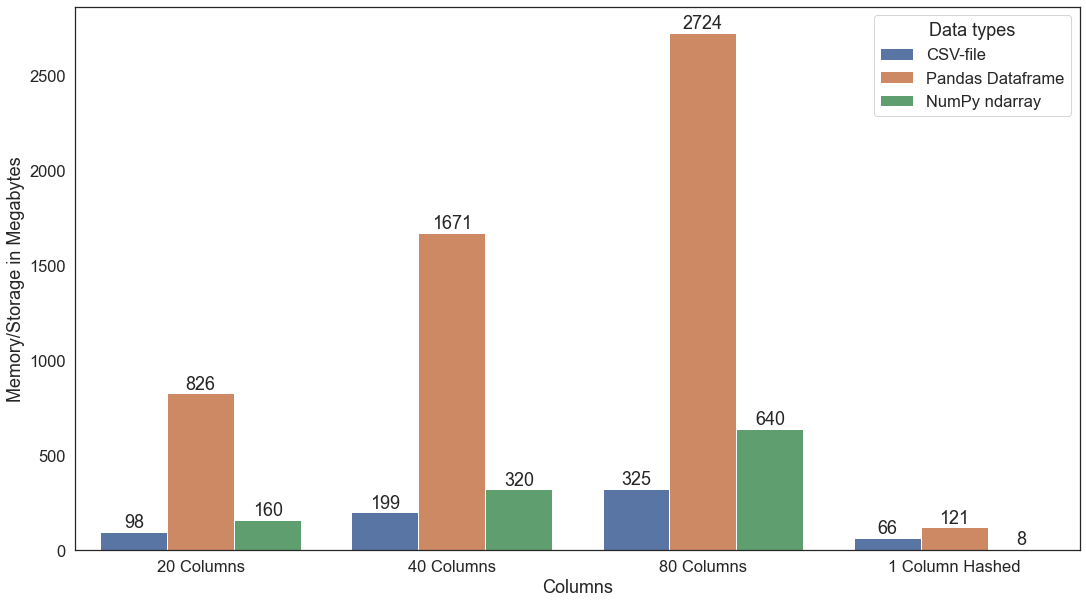

In [61]:
sns.set(font_scale=1.5)
sns.set_style("white")

fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x = 'Columns',
            y = 'Memory/Storage in Megabytes',
            hue = 'Data types',
            data = df)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

# Show the plot
plt.show()

<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">5. An Example of </h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Some text here</span><br>
    <br>
</div>

In [165]:
data = {
    'Customer name':  ['Bill', 'Paul', 'Lucy', 'Paul', 'Bill'],
    'Item purchased': ['Bike - Mountain bike', 'Skis - All-Mountain', 'Bike - Road bike', 'Swimwear', 'Bike - Mountain bike'],
    'Order date':     ['03.03.2022', '04.03.2022', '05.03.2022', '04.03.2022', '07.03.2022'],
    'Price':          [200, 300, 700, 50, 350],
    'Delivered':      [True, True, True, False, True],
       }

In [2]:
data = {
    'Customer name':  ['Bill', 'Paul', 'Lucy', 'Paul', 'Bill'],
    'Item purchased': ['Bike', 'Skis', 'Bike', 'Swimwear', 'Bike'],
    'Order date':     ['03.03.2022', '04.03.2022', '05.03.2022', '04.03.2022', '07.03.2022'],
    'Price':          [200, 300, 700, 50, 350],
    'Delivered':      [True, True, True, False, True],
       }

In [3]:
df = pd.DataFrame.from_dict(data)

In [4]:
column_list = df.columns

def key_maker(row):
    key = str()
    for column in column_list:
        key += str(row[column])
    return key

def hash_maker(input_string):
    return hashlib.sha256(input_string.encode('utf-8')).hexdigest()

df['Composite key'] = df.apply(key_maker, axis=1)
df['Hashed key'] = df['Composite key'].map(hash_maker)

In [5]:
df

,Customer name,Item purchased,Order date,Price,Delivered,Composite key,Hashed key
0,Bill,Bike,03.03.2022,200,True,BillBike03.03.2022200True,e923ad0e27e332dfa4667c613a7ab8f8cd6701645331a2...
1,Paul,Skis,04.03.2022,300,True,PaulSkis04.03.2022300True,d263340236d25235bbf6f162db76880ebc3a3a517b289f...
2,Lucy,Bike,05.03.2022,700,True,LucyBike05.03.2022700True,29947ba1e503e747ede777d5177a155f528c50ba5b4aac...
3,Paul,Swimwear,04.03.2022,50,False,PaulSwimwear04.03.202250False,2a8c964a4e2d83c6d628e9950c59eedb5945e444ddc003...
4,Bill,Bike,07.03.2022,350,True,BillBike07.03.2022350True,7199a3aeb60a5837e783594c301dab5eb8f9d5461fec17...


C:\Users\ARFEV\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


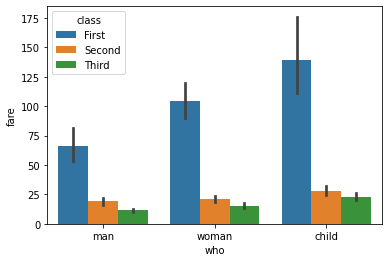

In [87]:

# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file
# from seaborn library
df = sns.load_dataset('titanic')
 
 
# who v/s fare barplot
sns.barplot(x = 'who',
            y = 'fare',
            hue = 'class',
            data = df)
 
# Show the plot
plt.show()

In [24]:
# Importing the first 10-rows into a Pandas dataframe, to look at the data
df_normal = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df_normal.to_csv("data/normal.csv", index=False, sep=";")

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_10308\2646446910.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


In [25]:
sys.getsizeof(df_normal)

2059554625

In [28]:
ndarray_normal = np.loadtxt(open("data/normal.csv", "rb"), delimiter=";", skiprows=1, dtype=object)

In [29]:
ndarray_normal.nbytes

328000000

In [33]:
df_test_correctness = pd.read_csv("data/test_data.csv", header=None, names=["Test-keys"])
df_test_correctness

,Test-keys
0,773bfe13dcdd0fbcf4968b1a3975d5d4261922f53dc97a...
1,c6f9d7b14505dbb5eb7c362685cd62c3c5f32c91abd0bd...
2,28fb5a8ff629d985828652d9dabd24ce265765941514a0...
3,9e0c6e6c7405c36e74b013dfe5fead457cb83c5b49fc74...
4,31d062d6dda1992a70e95102e01f6946c88df428525f7d...
...,...
999996,661c28bc4362e7bf20444c85b82516e4f121256af9a389...
999997,8d318f45745e4fa5280d4d808f7f2a8925dacd95ed06ca...
999998,4820362828b0b830f74b319762b0a5869770479b519b33...
999999,823ca7c7a0143152a59137997ad605499f1e7d1e040311...


In [34]:
array_true_correctness = np.loadtxt("data/test_data.csv", dtype=object)

In [35]:
array_true_correctness.nbytes, sys.getsizeof(df_test_correctness)

(8000008, 121000265)

In [47]:
sys.getsizeof(df_test_data)

121000265

In [23]:
key_list

['1EUTema_7Vurdering for læring2EUSpoersmaal_Q7208Har læreren snakket om hva som kreves for å oppnå de ulike karakterene i halvårsvurderingen i fag?11Ikke i noen fag2022-233IHele landet50Trøndelag - Trööndelage974560747Verdal videregående skole1EUGruppe_13419191BAA0AlleAlle utdanningsprogramAlleAlle utdanningsprogram11Videregående trinn 11GGutt0-10Alle eierformer****139723672759548']

In [16]:
len(key_list)

10000001

In [17]:
sys.getsizeof(key_list)

89095160

In [6]:
# Turn all columns into strings
dtype_dict = {i: str for i in df.columns}
#dtype_dict

In [11]:
column_list = df.columns

def key_maker(row):
    key = str()
    for column in column_list:
        key += str(row[column])
    return key

In [12]:
chunks = pd.read_csv('data/VGO_EUV_Tema_2022.csv', sep=";", encoding='cp1252', chunksize=1000000, dtype=dtype_dict)

In [ ]:
for i in chunks:
    print(i.shape)

(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)
(1000000, 41)


In [ ]:
for i, chunk in enumerate(chunks):
    print(i)

    start = time.perf_counter()
    df = chunk
    df['key'] = df.apply(key_maker, axis=1)
    df['key'].to_csv("data/new_csv.csv", sep=";")
    
    end = time.perf_counter()
    print(end - start)

    if i > 3: break

0
168.9231761
1
165.62659589999998
2


In [ ]:
# Get encoding and number of lines of CSV-file
with open('data/new_csv.csv') as file:
    encoding = file.encoding
    print(f"The encoding of the file is: {encoding}")
    for number_of_lines, line in enumerate(file):
        ...
    number_of_lines += 1 
    print(f"The number of lines in the file is: {number_of_lines:,}")

In [38]:
df = pd.read_csv('data/VGO-EUV-Tema-2022.zip', nrows=1000000, sep=";", encoding='cp1252', compression='zip')
df

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_11352\3279969207.py:1: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO-EUV-Tema-2022.zip', nrows=1000000, sep=";", encoding='cp1252', compression='zip')


,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999996,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999997,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999998,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548


# Testing the time with Pandas Vectorized

In [44]:
df_numpy = df.to_numpy()

In [54]:
df_numpy.dtype

dtype('O')

In [55]:
keys = [''.join(str(x)) for x in df_numpy]

In [49]:
keys

1
EUTema_36
T27 - Arbeidsmiljø
2
EUSpoersmaal_Q7132
I hvilken grad er du enig i følgende påstander om nettvett (informasjonskompetanse og digital dømmekraft)? Skolen har gitt meg god opplæring i kildekritikk (hvordan jeg kan gjøre meg opp en mening om i hvilken grad jeg kan stole på informasjonen som jeg har hentet)
0
Alle
Alle svar
2022-23
3
I
Hele landet
15
Møre og Romsdal
974576589
Kristiansund videregående skole
0
Alle
Alle grupper
2
YRK
Yrkesfaglig
IM
Informasjonsteknologi og medieproduksjon
1
2
Videregående trinn 2
1
G
Gutt
1
3
Offentlig skole
*
*
*
*
1
7236
72759548


In [4]:
column_list = df.columns

def key_tester(row):
    key = str()
    for column in column_list:
        key += str(row[column])
    return hashlib.sha256(key.encode('utf-8')).hexdigest()

In [43]:
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_34540\1379068951.py:1: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999996,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999997,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999998,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548


In [6]:
start = time.perf_counter()
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df['key'] = df.apply(key_tester, axis=1)
df['key'].to_csv("data/pandas_test.csv", mode='a', index=False, header=False)
end = time.perf_counter()
print(end - start)

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_34540\2868550784.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


231.20093480000003


In [10]:
#key_tester = np.vectorize(key_tester)

#start = time.perf_counter()
#df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
#df = df.astype(str)
#df['key'] = df.apply(key_tester, axis=1)
#df['key'].to_csv("data/pandas_test.csv", mode='a', index=False, header=False)
#end = time.perf_counter()
#print(end - start)

In [31]:
def vectorize_key(df, column_list=df.columns):
    key = str()
    for column in column_list:
        key = key + df[column].astype(str)
    return key #hashlib.sha256(key.encode('utf-8')).hexdigest()

vectorize_key = np.vectorize(vectorize_key)

In [30]:
start = time.perf_counter()
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df['key'] = vectorize_key(df, df.columns)
df['key'].to_csv("data/pandas_test.csv", mode='a', index=False, header=False)
end = time.perf_counter()
print(end - start)

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_34540\791050183.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


51.925437500000044


In [32]:
start = time.perf_counter()
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df['key'] = vectorize_key(df, df.columns)
df['key'].to_csv("data/pandas_test.csv", mode='a', index=False, header=False)
end = time.perf_counter()
print(end - start)

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_34540\791050183.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


TypeError: 'int' object is not subscriptable

# Testing the time with Pandas

In [55]:
column_list = df.columns

def key_tester(row):
    key = str()
    for column in column_list:
        key += str(row[column])
    return hashlib.sha256(key.encode('utf-8')).hexdigest()

In [51]:
# Importing the first 10-rows into a Pandas dataframe, to look at the data
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_12028\3993179474.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999996,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999997,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999998,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548


In [61]:
start = time.perf_counter()
df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')
df['key'] = df.apply(key_tester, axis=1)
df['key'].to_csv("data/pandas_test.csv", mode='a', index=False, header=False)
end = time.perf_counter()
print(end - start)

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_12028\2868550784.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO_EUV_Tema_2022.csv', nrows=1000000, sep=";", encoding='cp1252')


159.46924379999837


In [59]:
181 / 40

4.525

In [40]:
column_list = df.columns

def key_maker(row):
    key = str()
    for column in column_list:
        key += row[column]
    return key

def hash_maker(input_string):
    return hashlib.sha256(input_string.encode('utf-8')).hexdigest()

In [41]:
start = time.perf_counter()
df['key'] = df.apply(key_maker, axis=1)
end = time.perf_counter()
print(end - start)

130.14720880000004


In [42]:
start = time.perf_counter()
df['key_hash'] = df['key'].map(hash_maker)
end = time.perf_counter()
print(end - start)

3.0469804999997905


In [43]:
hash_series = df['key_hash']
test = hash_series.to_numpy()

In [44]:
hs_1 = hash_series.copy()
hs_2 = hash_series.copy()

In [45]:
na_1 = test.copy()
na_2 = test.copy()

In [51]:
start = time.perf_counter()
print( len(np.isin(na_1, na_2, invert=True)))
end = time.perf_counter()
print("time:", end - start)

KeyboardInterrupt: 

In [48]:
start = time.perf_counter()
print( all(hs_1.isin(hs_2[:]) ))
end = time.perf_counter()
print(end - start)

True
0.6687099999999191


In [50]:
start = time.perf_counter()
print(all (hs_1.isin(na_1[1:]) ))
end = time.perf_counter()
print(end - start)

False
0.6025887000000694


In [51]:
print(len(hs_1))
print(len(set(hs_1)))

2000000
228053


In [27]:
len(na_1[1000:])

1999000

In [19]:
hs_1

0          29a8d06b8693886147e233ccbbe34e36c9f8b9d8550e4e...
1          aabbf8a261e44fbb1662b9ec4ab526d66976657fe69c45...
2          d7a846a5468d21a2ebacb1c21f78ff702d28c6f682d165...
3          f2931cf0de54988d94294845084e0711040247107fb848...
4          7ed3b7cbd352c5953b08394a86c7624703ab295b452aad...
                                 ...                        
1999995    a9474de9276825a5d59bb987d6f6e4ea836becd51831bc...
1999996    d43ec5e023e56b5ff0e678f2e7150048f7093d2a3426a2...
1999997    23361d3fc15bf32efbf1cd8a054544dfb6b2b8fb78f1fd...
1999998    a4df3fcde2d41405317bbf2d03403b6e4a2383f6b28de7...
1999999    2589cb6b68bc15400f1bc793fc1191bf3c78e1a23cd0c9...
Name: key_hash, Length: 2000000, dtype: object

In [ ]:
# Very slow: 

start = time.perf_counter()
np.isin(na_1, na_2)
end = time.perf_counter()
print(end - start)

In [ ]:
np.version.version

In [11]:
df.memory_usage(deep=True)

Index                          128
TemaNivaa                 16000000
Temakode                 131129785
Temanavn                 199740430
SpoersmaalNivaa           16000000
Spoersmaalkode           150000000
Spoersmaalnavn           405134807
SvaralternativNivaa       16000000
SvaralternativKode        90092887
SvaralternativNavn       143890328
Skoleaarnavn             128000000
EnhetNivaa                16000000
Nasjonaltkode            116000000
Nasjonalt                135994456
Fylkekode                 16000000
Fylke                    153223497
Organisasjonsnummer      107241745
EnhetNavn                209238685
GruppeNivaa               16000000
GruppeKode               139329092
GruppeNavn               126933571
ProgramomraadeNivaa       16000000
UtdanningstypeKode       120587017
UtdanningstypeNavn       147995804
Utdanningsprogramkode    119792520
UtdanningsprogramNavn    155410566
TrinnNivaa                16000000
TrinnKode                 16000000
Trinnnavn           

In [12]:
df.memory_usage(deep=True).sum()

4537453808

In [13]:
df['key_hash'].memory_usage(deep=True)

242000128

In [14]:
import sys
sys.getsizeof(df)

4537453824

In [15]:
sys.getsizeof(df['key_hash'])

242000144

In [114]:
sys.getsizeof(test), sys.getsizeof(hash_series)

(104, 605000144)

In [110]:
len(test)

5000000

In [36]:
hash_series = df['key_hash']

In [17]:
hash_series.memory_usage(deep=True)

242000128

In [37]:
test = hash_series.to_numpy()

In [21]:
test.nbytes

16000000

In [20]:
16000000/242000128

0.06611566750906843

https://towardsdatascience.com/forgetful-pandas-98b50c1193a9

In [66]:
#del df

In [67]:
import pandas as pd
import sys  #system specific parameters and names
import gc   #garbage collector interface

gc.get_count()

(505, 5, 13)

In [68]:
gc.collect()
gc.get_count()

(12, 0, 0)

<div style="background-color: #DCE2F0"><br>
   <h2 style="font-size: 26pt; color: #50586C; padding-left: 40px;">2. Importing a sample of data</h2>
</div>


<div style="background-color: #DCE2F0"><br>
    <span style="color: #50586C; padding-left: 40px">Her er litt vanlig skrift</span><br>
    <span style="color: #50586C; padding-left: 40px">Her er litt vanlig skrift</span><br><br>
</div>

In [92]:
df = pd.read_csv('data/VGO-EUV-Tema-2022.zip', nrows=5000000, sep=";", encoding='cp1252', compression='zip')
df

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_7836\1010459658.py:1: DtypeWarning: Columns (7,15,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/VGO-EUV-Tema-2022.zip', nrows=5000000, sep=";", encoding='cp1252', compression='zip')


,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,0,-10,Alle eierformer,*,*,*,*,691,7236,72759548
4999996,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,0,-10,Alle eierformer,*,*,*,*,691,7236,72759548
4999997,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,0,-10,Alle eierformer,*,*,*,*,691,7236,72759548
4999998,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,0,-10,Alle eierformer,*,*,*,*,691,7236,72759548


In [93]:
df.columns

Index(['TemaNivaa', 'Temakode', 'Temanavn', 'SpoersmaalNivaa',
       'Spoersmaalkode', 'Spoersmaalnavn', 'SvaralternativNivaa',
       'SvaralternativKode', 'SvaralternativNavn', 'Skoleaarnavn',
       'EnhetNivaa', 'Nasjonaltkode', 'Nasjonalt', 'Fylkekode', 'Fylke',
       'Organisasjonsnummer', 'EnhetNavn', 'GruppeNivaa', 'GruppeKode',
       'GruppeNavn', 'ProgramomraadeNivaa', 'UtdanningstypeKode',
       'UtdanningstypeNavn', 'Utdanningsprogramkode', 'UtdanningsprogramNavn',
       'TrinnNivaa', 'TrinnKode', 'Trinnnavn', 'KjoennNivaa', 'KjoennKode',
       'Kjoenn', 'EierformNivaa', 'Eierformkode', 'EierformNavn', 'Score',
       'Standardavvik', 'AndelBesvart', 'AntallBesvart', 'Sidenummer',
       'RaderSide', 'RaderTotalt'],
      dtype='object')

In [94]:
column_list = ['Skoleaarnavn', 'Organisasjonsnummer', 'GruppeKode', 'Eierformkode', 'TrinnKode', 'KjoennKode', 'Spoersmaalkode']

In [95]:
column_list = ['Skoleaarnavn', 'Organisasjonsnummer', 'GruppeKode', 'Eierformkode', 'TrinnKode', 'KjoennKode', 'Spoersmaalkode']

def key_maker(row):
    key = str()
    for column in column_list:
        key += str(row[column])
    return key

In [96]:
df['key'] = df.apply(key_maker, axis=1)

In [97]:
df

,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt,key
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,3,Offentlig skole,*,*,*,*,1,7236,72759548,2022-23974576589Alle32GEUSpoersmaal_Q7132
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,-10,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576589Alle-102AEUSpoersmaal_Q7132
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,3,Offentlig skole,*,*,*,*,1,7236,72759548,2022-23974576589Alle32AEUSpoersmaal_Q7132
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,-10,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576589Alle-102GEUSpoersmaal_Q7132
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,-10,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576694Alle-102JEUSpoersmaal_Q7119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,-10,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974546671Alle-102GEUSpoersmaal_Q7003
4999996,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,-10,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974546744Alle-102GEUSpoersmaal_Q7003
4999997,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,-10,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23993527084Alle-102GEUSpoersmaal_Q7003
4999998,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,-10,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974544466Alle-102GEUSpoersmaal_Q7003


In [98]:
def hash(input_string):
    return hashlib.sha256(input_string.encode('utf-8')).hexdigest()

In [99]:
df['key_hash'] = df['key'].map(hash)

In [100]:
df

,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt,key,key_hash
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,Offentlig skole,*,*,*,*,1,7236,72759548,2022-23974576589Alle32GEUSpoersmaal_Q7132,29a8d06b8693886147e233ccbbe34e36c9f8b9d8550e4e...
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576589Alle-102AEUSpoersmaal_Q7132,aabbf8a261e44fbb1662b9ec4ab526d66976657fe69c45...
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,Offentlig skole,*,*,*,*,1,7236,72759548,2022-23974576589Alle32AEUSpoersmaal_Q7132,d7a846a5468d21a2ebacb1c21f78ff702d28c6f682d165...
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576589Alle-102GEUSpoersmaal_Q7132,f2931cf0de54988d94294845084e0711040247107fb848...
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,Alle eierformer,*,*,*,*,1,7236,72759548,2022-23974576694Alle-102JEUSpoersmaal_Q7119,7ed3b7cbd352c5953b08394a86c7624703ab295b452aad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974546671Alle-102GEUSpoersmaal_Q7003,309916b2d4a53b9b0f13d89ee4f13b3d961ddca1272148...
4999996,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974546744Alle-102GEUSpoersmaal_Q7003,80430dd4ffc51a1cc0dc7708d21f5b217b9b2f109e6962...
4999997,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23993527084Alle-102GEUSpoersmaal_Q7003,01db73a1128fb8972c28e909fb78b3aea467402a4012f3...
4999998,1,EUTema_25,"T16 - Trivsel med lærerne, mestring, elevdemok...",2,EUSpoersmaal_Q7003,Hvor godt arbeid synes du elevrådet gjør på sk...,1,0,Vet ikke,2022-23,...,Alle eierformer,*,*,*,*,691,7236,72759548,2022-23974544466Alle-102GEUSpoersmaal_Q7003,89aef351487382033fbaaed66289c124f509205c0cea2f...


In [101]:
df.memory_usage()

Index                         128
TemaNivaa                40000000
Temakode                 40000000
Temanavn                 40000000
SpoersmaalNivaa          40000000
Spoersmaalkode           40000000
Spoersmaalnavn           40000000
SvaralternativNivaa      40000000
SvaralternativKode       40000000
SvaralternativNavn       40000000
Skoleaarnavn             40000000
EnhetNivaa               40000000
Nasjonaltkode            40000000
Nasjonalt                40000000
Fylkekode                40000000
Fylke                    40000000
Organisasjonsnummer      40000000
EnhetNavn                40000000
GruppeNivaa              40000000
GruppeKode               40000000
GruppeNavn               40000000
ProgramomraadeNivaa      40000000
UtdanningstypeKode       40000000
UtdanningstypeNavn       40000000
Utdanningsprogramkode    40000000
UtdanningsprogramNavn    40000000
TrinnNivaa               40000000
TrinnKode                40000000
Trinnnavn                40000000
KjoennNivaa   

In [51]:
df.dtypes

TemaNivaa                 int64
Temakode                 object
Temanavn                 object
SpoersmaalNivaa           int64
Spoersmaalkode           object
Spoersmaalnavn           object
SvaralternativNivaa       int64
SvaralternativKode       object
SvaralternativNavn       object
Skoleaarnavn             object
EnhetNivaa                int64
Nasjonaltkode            object
Nasjonalt                object
Fylkekode                 int64
Fylke                    object
Organisasjonsnummer      object
EnhetNavn                object
GruppeNivaa               int64
GruppeKode               object
GruppeNavn               object
ProgramomraadeNivaa       int64
UtdanningstypeKode       object
UtdanningstypeNavn       object
Utdanningsprogramkode    object
UtdanningsprogramNavn    object
TrinnNivaa                int64
TrinnKode                 int64
Trinnnavn                object
KjoennNivaa               int64
KjoennKode               object
Kjoenn                   object
Eierform

In [37]:
df.dtypes

TemaNivaa                 int64
Temakode                 object
Temanavn                 object
SpoersmaalNivaa           int64
Spoersmaalkode           object
Spoersmaalnavn           object
SvaralternativNivaa       int64
SvaralternativKode       object
SvaralternativNavn       object
Skoleaarnavn             object
EnhetNivaa                int64
Nasjonaltkode            object
Nasjonalt                object
Fylkekode                 int64
Fylke                    object
Organisasjonsnummer      object
EnhetNavn                object
GruppeNivaa               int64
GruppeKode               object
GruppeNavn               object
ProgramomraadeNivaa       int64
UtdanningstypeKode       object
UtdanningstypeNavn       object
Utdanningsprogramkode    object
UtdanningsprogramNavn    object
TrinnNivaa                int64
TrinnKode                 int64
Trinnnavn                object
KjoennNivaa               int64
KjoennKode               object
Kjoenn                   object
Eierform

In [46]:
df['key_hash'].iloc[0]

18843095560923654843346214715790911398864063672305750101136307732944682769110

In [19]:
int(df['test'].iloc[0], 16)

18843095560923654843346214715790911398864063672305750101136307732944682769110

In [52]:
72000000**2

5184000000000000

In [53]:
72000000*2

144000000

In [ ]:
start = time.perf_counter()

columns_in_key = df.columns
input_file = 'data/VGO_EUV_Tema_2022.csv'
output_file = 'data/test_data.csv'

with open(input_file) as file_read:
    DictReader_obj = csv.DictReader(file_read, delimiter=';')
    
    key_list = []
    count = 1
    
    for i, data in enumerate(DictReader_obj):
        if i > 1000000: 
            break
        
        # Every time the list reaches 1,000,000 rows, we write the rows to file and empty the list 
        limit = 100000
        if (i > 1) and (i % limit) == 0: 
            with open(output_file, 'a') as file_write:
                file_write.writelines(key_list)
            key_list = []
            print(f"Iteration {count: <10} A total of {count * limit} rows written to {output_file}")
            count += 1
        
        # We create hashed keys that are stored in key_list. Each key consists of all its columnvalues concatinated and then hashed
        key = str()
        for column in columns_in_key:
            key += str(data[column])
        key = hashlib.sha256(key.encode('utf-8')).hexdigest()
        key = key.upper()
        key += "\n"
        key_list.append(key)

    # Write the remaining rows to file    
    with open(output_file, 'a') as file_write:
        file_write.writelines(key_list)
    del key_list
            
end = time.perf_counter()
print("")
print("Time in seconds:", round(end - start, 2))
print("Time in minutes:", round((end - start)/ 60, 2))

In [129]:
#sys.getsizeof(df_test_data)
df_test_data.memory_usage(deep=True)

121000265

In [136]:
sum(df_test_data.memory_usage(deep=True))

121000249

In [131]:
# Confirming that the data looks fine
df_test2_data = pd.read_csv('data/test2_data.csv')  #nrows=10
df_test2_data

C:\Users\ARFEV\AppData\Local\Temp\ipykernel_12028\904630515.py:2: DtypeWarning: Columns (7,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test2_data = pd.read_csv('data/test2_data.csv')  #nrows=10


,TemaNivaa,Temakode,Temanavn,SpoersmaalNivaa,Spoersmaalkode,Spoersmaalnavn,SvaralternativNivaa,SvaralternativKode,SvaralternativNavn,Skoleaarnavn,...,EierformNivaa,Eierformkode,EierformNavn,Score,Standardavvik,AndelBesvart,AntallBesvart,Sidenummer,RaderSide,RaderTotalt
0,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
1,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
2,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,1,3,Offentlig skole,*,*,*,*,1,7236,72759548
3,1,EUTema_36,T27 - Arbeidsmiljø,2,EUSpoersmaal_Q7132,I hvilken grad er du enig i følgende påstander...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
4,1,EUTema_35,T26 - Arbeidsmiljø,2,EUSpoersmaal_Q7119,Er du blitt utsatt for urettferdig behandling/...,0,Alle,Alle svar,2022-23,...,0,-10,Alle eierformer,*,*,*,*,1,7236,72759548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999996,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999997,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548
999998,1,EUTema_7,Vurdering for læring,2,EUSpoersmaal_Q7208,Har læreren snakket om hva som kreves for å op...,1,1,Ikke i noen fag,2022-23,...,0,-10,Alle eierformer,*,*,*,*,139,7236,72759548


In [135]:
sum(df_test2_data.memory_usage(deep=True))

2059554609

In [132]:
sys.getsizeof(df_test2_data)

2059554625

In [137]:
2059554625 / 121000249

17.021077576460193

In [ ]:
import multiprocessing as mp

def worker_function(item, q):
    """
    do some work, put results in queue
    """
    res = f'item: {item} - result: {item ** 2}'
    print(res)
    q.put(res)


def listener(q):
    """
    continue to listen for messages on the queue and writes to file when receive one
    if it receives a '#done#' message it will exit
    """
    with open('output.txt', 'a') as f:
        while True:
            m = q.get()
            if m == '#done#':
                break
            f.write(str(m) + '\n')
            f.flush()


if __name__ == '__main__':
    manager = mp.Manager()
    q = manager.Queue()
    file_pool = mp.Pool(1)
    file_pool.apply_async(listener, (q, ))

    pool = mp.Pool(16)
    jobs = []
    for item in range(10000):
        job = pool.apply_async(worker_function, (item, q))
        jobs.append(job)

    for job in jobs:
        job.get()

    q.put('#done#')  # all workers are done, we close the output file
    pool.close()
    pool.join()

In [2]:
from concurrency2 import start

In [3]:
start()

In [6]:
print(np.linspace(start = 0, stop = 100001, num = 5, endpoint = True, retstep = True, dtype = int))

(array([     0,  33333,  66667, 100001]), 33333.666666666664)


In [7]:
space = np.linspace(start = 0, stop = 100001, num = 5, endpoint = True, retstep = True, dtype = int)

In [13]:
space[0][1:]

array([ 25000,  50000,  75000, 100001])

In [18]:
first = 0
for second in space[0][1:]:
    print(first, second)
    first = second +1

0 25000
25001 50000
50001 75000
75001 100001
